In [5]:
import os
import urllib.request
import numpy as np

from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt

In [67]:
#load file names
DEFAULT_DATA_PATH = 'data/'
#저장하고자 하는 디렉터리가 존재하지 않을 경우 생성해줍니다
if not os.path.isdir(DEFAULT_DATA_PATH):
    os.makedirs(os.path.join(DEFAULT_DATA_PATH))
    
files = [file_i for file_i in os.listdir(DEFAULT_DATA_PATH) if file_i.endswith('.jpg')]
#후에 tsne에서 사용하기 위해 이미지 갯수를 저장합니다
image_count = len(files)
print('image_count : %s ' % image_count)
#파일 명이 정상 로드됬는지 확인합니다
print(files)

image_count : 25 
['j-11.jpg', 'j-10.jpg', '307344_193140860755365_1983556886_n.jpg', '60d592a9e54030ec45a7741040e76fd4.jpg', '7d7ef97827ab5357f9d7e4f17015c1f7.jpg', '35.jpg', '22.jpg', '1111.jpg', '33.jpg', '8324b85883473391455fdef8f40caa45.jpg', '32.jpg', '0a0de4d55e28809eb3533930a0d9ca9a.jpg', '5f1b53a767d5e39af3e782a80f14414e.jpg', '5.jpg', '55.jpg', 'j-6.jpg', '222.jpg', 'j-7.jpg', '6.jpg', '44.jpg', 'j-3.jpg', '1.jpg', '2344FD4857F3ACDC1B.jpg', '3D-Metal-assembly-model-Terran-mode.jpg', 'j-1.jpg']


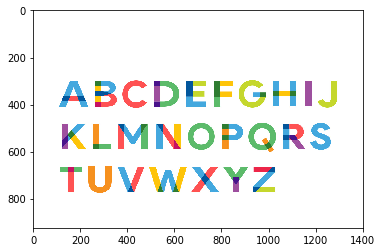

In [7]:
img = plt.imread(os.path.join(DEFAULT_DATA_PATH,files[5]))
plt.imshow(img)

In [8]:
#image resize _ to square
from scipy.misc import imresize
def imcrop_tosquare(img):
    """Make any image a square image.

    Parameters
    ----------
    img : np.ndarray
        Input image to crop, assumed at least 2d.

    Returns
    -------
    crop : np.ndarray
        Cropped image.
    """
    if img.shape[0] > img.shape[1]: #이미지의 세로가 가로보다 클 경우
        extra = (img.shape[0] - img.shape[1])
        if extra % 2 == 0: #extra is even
            crop = img[extra // 2:-extra // 2, :]
        else:
            crop = img[max(0, extra // 2 + 1):min(-1, -(extra // 2)), :]
    elif img.shape[1] > img.shape[0]:#이미지의 가로가 세로보다 클 경우
        extra = (img.shape[1] - img.shape[0])
        if extra % 2 == 0:
            crop = img[:, extra // 2:-extra // 2]
        else:
            crop = img[:, max(0, extra // 2 + 1):min(-1, -(extra // 2))]
    else:
        crop = img
    return crop

In [9]:
#이미지 margin 처리. 여기서는 0.2 만큼 삭제
def imcrop(img, amt):
    if amt <= 0 or amt >= 1:
        return img
    row_i = int(img.shape[0] * amt) // 2
    col_i = int(img.shape[1] * amt) // 2
    return img[row_i:-row_i, col_i:-col_i]

/anaconda3/envs/dlc_test_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  after removing the cwd from sys.path.


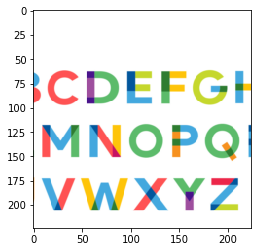

In [10]:
#image crop & load
square = imcrop_tosquare(img)
crop = imcrop(square, 0.2)
rsz = imresize(crop, (224, 224))
plt.imshow(rsz)

j-11.jpg
j-10.jpg
307344_193140860755365_1983556886_n.jpg
60d592a9e54030ec45a7741040e76fd4.jpg
7d7ef97827ab5357f9d7e4f17015c1f7.jpg
35.jpg
22.jpg
1111.jpg


/anaconda3/envs/dlc_test_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  import sys


33.jpg
8324b85883473391455fdef8f40caa45.jpg
32.jpg
0a0de4d55e28809eb3533930a0d9ca9a.jpg
5f1b53a767d5e39af3e782a80f14414e.jpg
5.jpg
55.jpg
j-6.jpg
222.jpg
j-7.jpg
6.jpg
44.jpg
j-3.jpg
1.jpg
2344FD4857F3ACDC1B.jpg
3D-Metal-assembly-model-Terran-mode.jpg
j-1.jpg
25


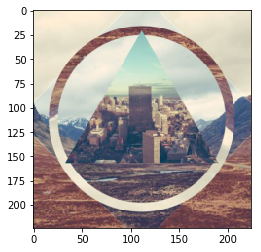

In [11]:
imgs = []
for file_i in files:
    print(file_i)
    a = plt.imread(os.path.join(DEFAULT_DATA_PATH,file_i))
    square = imcrop_tosquare(a)
    crop = imcrop(square, 0.2)
    rsz = imresize(crop, (224, 224))
    imgs.append(rsz)
print(len(imgs))
plt.imshow(imgs[0])

In [12]:
### access to google drive
### https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA


# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

In [13]:
#/content/gdrive/My Drive/Classroom/Special Topics : creative AI/example_tSNE
# img=plt.imread("/content/gdrive/My Drive/Classroom/Special Topics : creative AI/example_tSNE/data/img_SM_224_224/0.jpg")
# plt.imshow(img)

In [16]:
dir = DEFAULT_DATA_PATH+'crop'
#cropped file names 
#크롭핑 된 파일 명을 다시 불러오고
files_crop = [file_i
         for file_i in os.listdir(dir)
        if file_i.endswith('.jpg')]


#croped images load
imgs_crop = []
for file_i in files_crop:
    a = plt.imread(os.path.join(dir, file_i))
    imgs_crop.append(a)
    
imgs_crop = np.array(imgs_crop)
imgs_crop = np.float32(imgs_crop)


In [17]:
from PIL import Image
# 만약에 폴더가 없다면, 폴더를 생성
#os.mkdir(os.path.join('data','img_SM_224_224'))

In [18]:
#square, crop, resize한 이미지들을 해달 폴더에 저장.
for index, item in enumerate(imgs, start=0):
    im = Image.fromarray(item)
    path = DEFAULT_DATA_PATH+'crop/'+str(index)+'.jpg'
    im.save(path, 'JPEG')

In [19]:
#cropped file names 
files_crop = [file_i
         for file_i in os.listdir(DEFAULT_DATA_PATH+'crop/')
        if file_i.endswith('.jpg')]

#croped images load
imgs_crop = []
for file_i in files_crop:
    a = plt.imread(os.path.join(DEFAULT_DATA_PATH+'crop/', file_i))
    imgs_crop.append(a)
    
imgs_crop = np.array(imgs_crop)
imgs_crop = np.float32(imgs_crop)

In [20]:
#shape 점검 알파값이 있는 형식을 사용했을 경우 224,224,4 형태로 나오는데 이는 rgba->rgb로 컨버트 해줘야합니다
print(imgs_crop.shape)
print(imgs_crop[0].shape)
print(imgs_crop.dtype)

(25, 224, 224, 3)
(224, 224, 3)
float32


In [21]:
#extend 1st dimension for feature extraction
#feature extraction을 위해 기존 이미지를 차원 확장
imgs_ex=[]
for index, img in enumerate(imgs_crop):
    img = np.expand_dims(img, axis=0)
    imgs_ex.append(img)

In [22]:
#imgs_ex의 shape확인. 1차원 확장이 되었음을 확인할 수 있습니당
print(np.array(imgs_ex).shape)
print(np.array(imgs_ex).dtype)

(25, 1, 224, 224, 3)
float32


In [23]:
import keras

Using TensorFlow backend.
/anaconda3/envs/dlc_test_env/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [24]:
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model
#from tensorflow.keras.models import Model

In [25]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

Instructions for updating:
Colocations handled automatically by placer.


In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [27]:
print(imgs_crop.shape)
print(imgs_crop.dtype)

(25, 224, 224, 3)
float32


predicted pill_bottle with probability 0.789
predicted bottlecap with probability 0.118
predicted water_bottle with probability 0.037
predicted beaker with probability 0.020
predicted nipple with probability 0.019


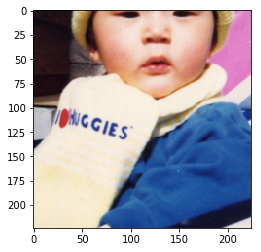

In [28]:
#3 번째 이미지를 예측
plt.imshow(imgs[2])
predictions = model.predict(imgs_ex[2])

# print(decode_predictions(predictions))
for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))

In [29]:
# forward the image through the network, but the image should be a shape of 4D(x,x,x,x)
predictions = model.predict(imgs_ex[2])

for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))

predicted pill_bottle with probability 0.789
predicted bottlecap with probability 0.118
predicted water_bottle with probability 0.037
predicted beaker with probability 0.020
predicted nipple with probability 0.019


In [30]:
print(decode_predictions(predictions))

[[('n03937543', 'pill_bottle', 0.7890816), ('n02877765', 'bottlecap', 0.11832211), ('n04557648', 'water_bottle', 0.037275545), ('n02815834', 'beaker', 0.019775005), ('n03825788', 'nipple', 0.018748257)]]


--------------------


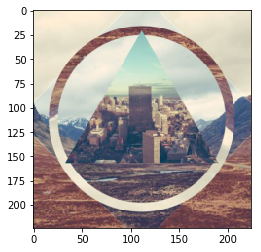

radiator
fountain
suspension_bridge
bannister
worm_fence
--------------------


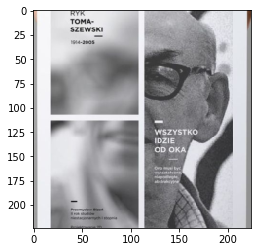

hog
piggy_bank
ox
triceratops
hair_slide
--------------------


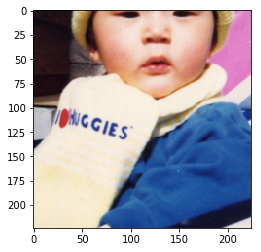

pill_bottle
bottlecap
water_bottle
beaker
nipple
--------------------


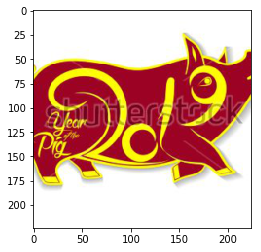

web_site
envelope
cash_machine
street_sign
wall_clock
--------------------


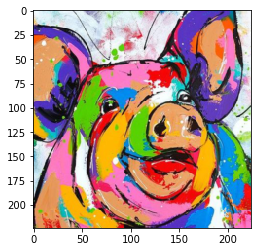

gasmask
oxygen_mask
bulletproof_vest
lab_coat
mask
--------------------


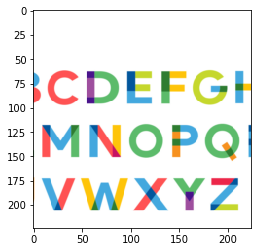

lab_coat
stethoscope
jersey
hair_spray
cleaver
--------------------


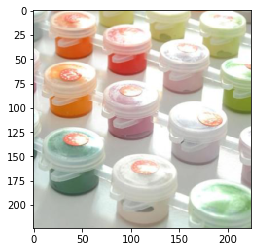

piggy_bank
triceratops
ocarina
Granny_Smith
mortar
--------------------


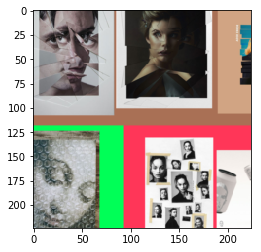

hard_disc
menu
crossword_puzzle
envelope
web_site
--------------------


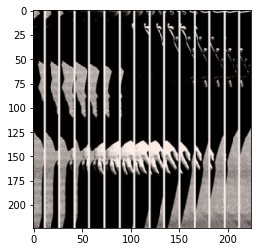

jigsaw_puzzle
jellyfish
ant
envelope
parachute
--------------------


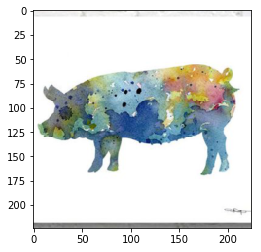

swab
pedestal
crate
chest
wig
--------------------


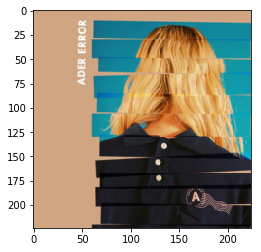

candle
hair_slide
pinwheel
piggy_bank
perfume
--------------------


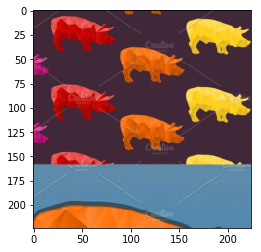

lab_coat
Windsor_tie
mosquito_net
window_shade
shower_curtain
--------------------


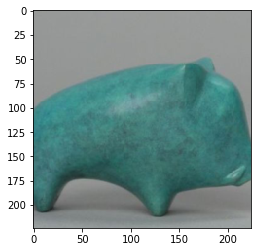

cleaver
seat_belt
wig
neck_brace
hand_blower
--------------------


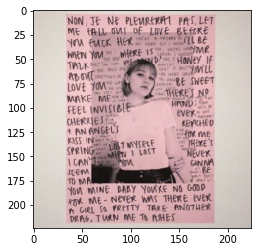

assault_rifle
revolver
chain_saw
reel
rifle
--------------------


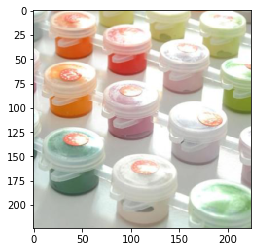

coil
maze
potter's_wheel
toilet_tissue
paper_towel
--------------------


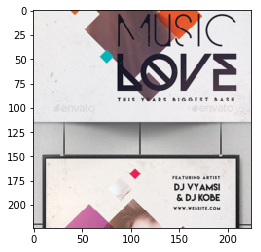

stole
lab_coat
poncho
pajama
shower_curtain
--------------------


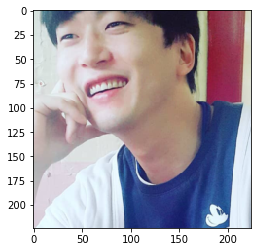

measuring_cup
nipple
beaker
pill_bottle
Petri_dish
--------------------


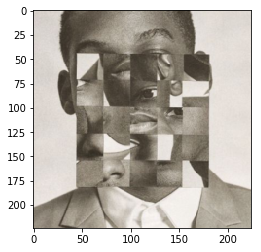

handkerchief
bib
paintbrush
comic_book
maraca
--------------------


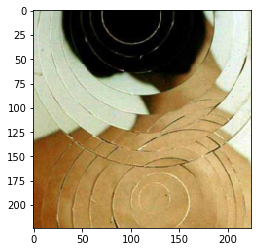

envelope
web_site
hand_blower
whistle
binder
--------------------


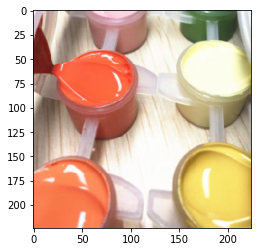

web_site
remote_control
pay-phone
cash_machine
monitor
--------------------


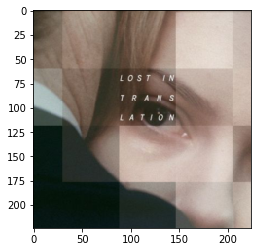

pill_bottle
bottlecap
water_bottle
beaker
nipple
--------------------


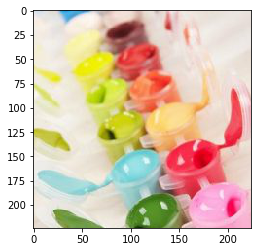

neck_brace
diaper
nipple
toilet_tissue
Band_Aid
--------------------


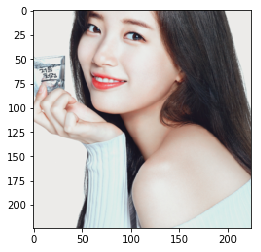

hair_slide
whistle
hook
can_opener
rubber_eraser
--------------------


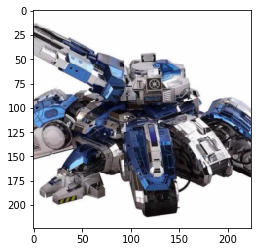

oxygen_mask
web_site
brassiere
perfume
hourglass
--------------------


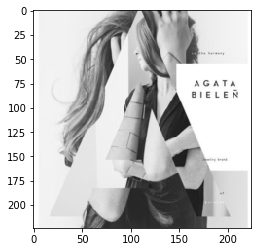

sunglasses
shower_cap
loupe
mosquito_net
bubble


In [31]:
import time
#for the entire predictions
for index, img in enumerate(imgs_ex):
    predict = model.predict(img)
    print('--------------------')
    plt.imshow(imgs[index])
    plt.pause(0.05)
    for _, pred, prob in decode_predictions(predict)[0]:
        print(pred)
# plt.show()

In [32]:
#fully connected layer 2의 feature 축출하기
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

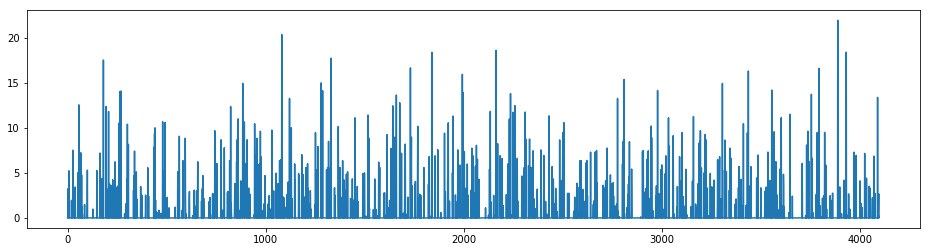

In [45]:
#feature 시각화
feat = feat_extractor.predict(imgs_ex[2])
plt.figure(figsize=(16,4))
plt.plot(feat[0])

In [46]:
#feature shape는 4096이겠죠? VGG16 모델 참고
print(feat.shape)

(1, 4096)


In [47]:
#각 이미지의 feature를 리스트로 모으면서 시간을 출력해봅니다
import time
tic = time.clock()

features = []
for i, img in enumerate(imgs_ex):
    #3장 당 한 번 씩 얼마나 걸리는지 출력도 해보고
    if i % 3 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(imgs_ex),elap))
        tic = time.clock()    
    #각 추출된 feature를 리스트에 모아봅니다
    feat = feat_extractor.predict(img)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(imgs_ex))

/anaconda3/envs/dlc_test_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/dlc_test_env/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':
/anaconda3/envs/dlc_test_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


analyzing image 0 / 25. Time: 0.0004 seconds.
analyzing image 3 / 25. Time: 4.3891 seconds.
analyzing image 6 / 25. Time: 4.4800 seconds.
analyzing image 9 / 25. Time: 4.4221 seconds.
analyzing image 12 / 25. Time: 4.4420 seconds.
analyzing image 15 / 25. Time: 4.6105 seconds.
analyzing image 18 / 25. Time: 4.5933 seconds.
analyzing image 21 / 25. Time: 4.5532 seconds.
analyzing image 24 / 25. Time: 4.5137 seconds.
finished extracting features for 25 images


In [48]:
#결과적으로 shape는 image_count, feature_shape
features = np.array(features)
#features = np.reshape(features, (-1, 1))
print(features.shape)
#features_sq=np.squeeze(features, axis=1).shape
#print(np.array(features_sq).shape)

(25, 4096)


In [49]:
from sklearn.decomposition import PCA

# pca = PCA(n_components=7)
pca = PCA(n_components=min(image_count, 50))
pca.fit(features)

# df['pca-one'] = pca_result[:,0] 
# df['pca-two'] = pca_result[:,1] 
# df['pca-three'] = pca_result[:,2] 
        
print( 'Explained variation per principle component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principle component: [2.2957543e-01 9.1007069e-02 6.7101672e-02 6.5165609e-02 5.3788640e-02
 5.0924260e-02 4.6980821e-02 4.5709562e-02 4.4100732e-02 3.7811220e-02
 3.2754268e-02 3.2638527e-02 2.8768484e-02 2.7999287e-02 2.5235390e-02
 2.1380564e-02 1.9518618e-02 1.7045397e-02 1.5477685e-02 1.4458045e-02
 1.2220447e-02 1.0741907e-02 9.5964028e-03 2.8024648e-15 7.9688496e-18]


In [50]:
#8차원으로 감소된 feature를 출력해봅니다
pca_features = pca.transform(features)
#print(pca_features.shape)
#pca_features = pca.transform(features)
#민세희 교수님 자료에서 정상적으로 수정되었다면 차원감소된 feature의 shape가 나와야합니다(ex img_count, img_count or 50)
# print(pca_features.shape)
# print(pca_features)

print(features.shape)
print(pca_features.shape)

(25, 4096)
(25, 25)


In [51]:
#pickle은 직렬화 모듈입니다 https://wayhome25.github.io/cs/2017/04/04/cs-04/ 참고
import pickle
# print(pca_features)
#원하는 주소에 이미지, feature, pca를 직렬화 하여 저장합니다
# pickle.dump([imgs, features, pca], open('data/features_test.p', 'wb'))
#기존 교수님 자료에 pca로 차원감소한 feature가 아닌 그냥 feature가 들어가 있어서 수정했습니다
pickle.dump([imgs, pca_features, pca], open(DEFAULT_DATA_PATH+'features_test.p', 'wb'))

In [52]:
%matplotlib inline
import os
import random
import numpy as np
import json
import matplotlib.pyplot
import pickle
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE

image: [[[242 231 209]
  [242 231 209]
  [243 232 210]
  ...
  [237 231 209]
  [236 230 208]
  [236 230 208]]

 [[242 231 209]
  [242 231 209]
  [243 232 210]
  ...
  [236 230 208]
  [236 230 208]
  [235 229 207]]

 [[243 232 210]
  [243 232 210]
  [242 231 209]
  ...
  [235 229 207]
  [234 228 206]
  [234 228 206]]

 ...

 [[118  80  83]
  [117  77  81]
  [138  97 101]
  ...
  [ 95  59  66]
  [ 97  58  63]
  [ 99  58  62]]

 [[107  67  70]
  [126  85  89]
  [133  92  96]
  ...
  [119  79  82]
  [125  82  83]
  [114  70  70]]

 [[101  59  61]
  [102  60  63]
  [107  65  69]
  ...
  [123  80  80]
  [153 108 105]
  [139  93  90]]], features: -19.93,-7.91,77.96,20.28... 
image: [[[217 174 155]
  [216 174 155]
  [220 181 162]
  ...
  [103  64  45]
  [ 97  58  39]
  [ 91  55  37]]

 [[217 175 158]
  [219 176 158]
  [225 185 166]
  ...
  [100  63  43]
  [ 93  55  36]
  [ 89  55  36]]

 [[214 174 158]
  [218 177 159]
  [224 185 166]
  ...
  [ 97  61  41]
  [ 93  56  37]
  [ 91  56  37]]

 ...

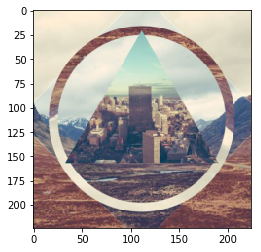

In [53]:
#저장했던 직렬화 모둘을 불러오고
images, pca_f, pca = pickle.load(open(DEFAULT_DATA_PATH+'features_test.p', 'rb'))
#출력도 한 번 해봅니다
for img, f in list(zip(images, pca_f))[0:5]:
    print("image: %s, features: %0.2f,%0.2f,%0.2f,%0.2f... "%(img, f[0], f[1], f[2], f[3]))
    
#이미지도 잘 직렬화되었는지 한 번 출력해 보고
print(len(images))
plt.imshow(images[0])

In [54]:
print(pca_f.shape)

(25, 25)


25


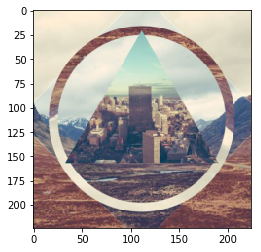

In [55]:
print(len(images))
plt.imshow(images[0])

In [56]:
print(pca_f.shape)

(25, 25)


In [57]:
#T_sne로 2차원으로 2차 차원 감소
#겉핥기 식으로 보기에는 T_sne가 데이터 군집화가 훨씬 잘되는 대신 느리다고 하네요(그래서 pca로 먼저 차원감소)
#정확한 개념은 따로 찾아보시는게 좋을 것 같습니다(수학 머리아펑)
X = np.array(pca_f)
print(X.shape)
tsne = TSNE(n_components=2, learning_rate=150, perplexity=1, angle=0.2, verbose=2).fit_transform(X)
                                                                                                  
print(tsne.shape)  

(25, 25)
[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 25 samples in 0.000s...
[t-SNE] Computed neighbors for 25 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 25 / 25
[t-SNE] Mean sigma: 3.320187
[t-SNE] Computed conditional probabilities in 0.002s
[t-SNE] Iteration 50: error = 95.9377899, gradient norm = 1.0588627 (50 iterations in 0.009s)
[t-SNE] Iteration 100: error = 74.7104721, gradient norm = 0.2020831 (50 iterations in 0.008s)
[t-SNE] Iteration 150: error = 77.9123383, gradient norm = 0.5398290 (50 iterations in 0.009s)
[t-SNE] Iteration 200: error = 84.6131287, gradient norm = 0.3273997 (50 iterations in 0.009s)
[t-SNE] Iteration 250: error = 85.8491974, gradient norm = 0.2245869 (50 iterations in 0.009s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.849197
[t-SNE] Iteration 300: error = 2.2035139, gradient norm = 0.0016104 (50 iterations in 0.010s)
[t-SNE] Iteration 350: error = 1.6478478, gradient norm = 0.00242

In [58]:
tsne[:,0]

array([  41.740765,  -44.450523, -241.53598 ,   96.99356 ,  123.215004,
         43.69791 ,  -21.16575 ,   88.036964,   44.80008 ,  124.16473 ,
         42.439167,  104.71726 ,   62.82393 ,   40.786648,  103.253845,
         65.6199  , -268.87463 ,   13.974525,  102.13081 ,  153.13315 ,
       -253.1732  ,   29.063894,  111.32594 ,   64.66493 ,   59.17659 ],
      dtype=float32)

In [59]:
tsne[:,1]

array([  91.93271 , -126.57039 ,  417.95346 ,  120.23389 , -114.572334,
       -152.57967 , -132.53621 ,   92.10138 , -243.64986 ,  103.222275,
       -219.38339 , -135.91061 , -172.50352 ,  -80.00939 ,   51.322674,
       -129.73694 ,  435.0914  , -185.25261 ,  138.08424 ,  134.71696 ,
        406.9103  , -144.47336 ,  164.75217 ,  129.72281 ,  179.1543  ],
      dtype=float32)

In [60]:
#한 화면 안에 담아내야 하므로 min max 값에 맞춰 값을 조절해줍니다
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

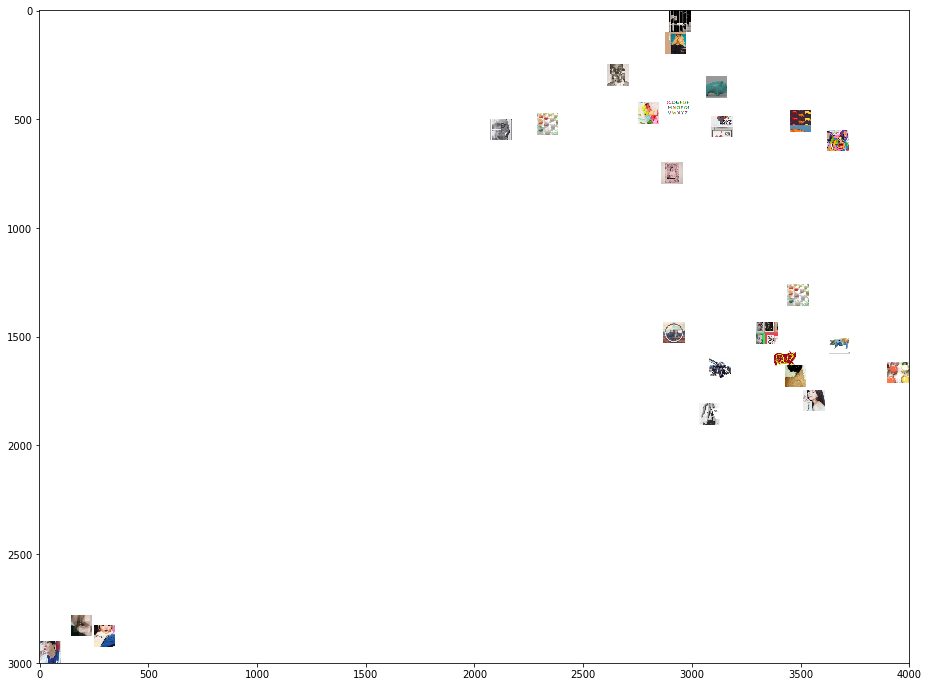

In [61]:
width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGBA', (width, height))

for img, x, y in zip(images, tx, ty):
    tile = Image.fromarray(img, 'RGB')
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))
matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

In [62]:
# import nmslib
# # Initializes a new index
# index = nmslib.init(space='angulardist')
# # Add the datapoints to the index
# index.addDataPointBatch(features_pca)
# # Create the index for querying
# index.createIndex()
# # nearest neighborhood on features array
# nn_idxs, nn_dists = zip(*index.knnQueryBatch(features_pca, k=20, num_threads=4))

In [63]:
# from igraph import *
# # create graph instance
# g = Graph()
# # create the vertices
# g.add_vertices(dataset_size)
# # create the edges for each element in the kNN distances array
# for i in range(size):
#     for j in range(1, k):
#         g.add_edge(nn_idxs[i][0], nn_idxs[i][j], weight=nn_dists[i][j])

In [68]:
#190508 by ADOHI
import json

dict_to_json = {}
dict_to_json['images'] = []
#딕셔너리를 만들어줍니다
#!float32(numpy) 형식은 json으로 컨버트 되지 않기 때문에 tx, ty의 형식을 float로 변환시켜 줍니다
#files_crop은 민세희교수님 자료에서 crop된 파일들의 이름이 저장되어있는 리스트입니다
for file_name, x, y in zip(files_crop, map(float, tx), map(float, ty)):
  dict_to_json['images'].append({
    'name': file_name,
    'x': x,
    'y': y,
})

#딕셔너리가 잘 생성됬는지 확인
print(dict_to_json)


#dict2json, sort_keys는 키를 정렬할 지 여부, indent는 보기 좋게 정렬/들여쓰기를 얼마나 할 것인지에 대한 여부
with open(DEFAULT_DATA_PATH+'json/data.json', 'w') as outfile:
    json.dump(dict_to_json, outfile, sort_keys=True, indent=4)

{'images': [{'name': '8.jpg', 'x': 0.7360418438911438, 'y': 0.49441900849342346}, {'name': '9.jpg', 'x': 0.5318008661270142, 'y': 0.17249499261379242}, {'name': '14.jpg', 'x': 0.06478234380483627, 'y': 0.9747503995895386}, {'name': '15.jpg', 'x': 0.8669702410697937, 'y': 0.5361155271530151}, {'name': '17.jpg', 'x': 0.9291052222251892, 'y': 0.19017189741134644}, {'name': '16.jpg', 'x': 0.7406795620918274, 'y': 0.1341751217842102}, {'name': '12.jpg', 'x': 0.5869770646095276, 'y': 0.16370545327663422}, {'name': '13.jpg', 'x': 0.8457464575767517, 'y': 0.4946674704551697}, {'name': '11.jpg', 'x': 0.7432913184165955, 'y': 0.0}, {'name': '10.jpg', 'x': 0.9313557147979736, 'y': 0.5110520720481873}, {'name': '21.jpg', 'x': 0.7376968264579773, 'y': 0.035752154886722565}, {'name': '20.jpg', 'x': 0.8852725028991699, 'y': 0.15873388946056366}, {'name': '22.jpg', 'x': 0.7860010266304016, 'y': 0.10482098907232285}, {'name': '23.jpg', 'x': 0.7337809801101685, 'y': 0.24109403789043427}, {'name': '18.jp